<a href="https://colab.research.google.com/github/Syedmuhammadhussainshah/Syedmuhammadhussainshah/blob/main/Direct_%26_Corporate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
%matplotlib inline

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

--- Raw Data Sample ---
     Month       Channel       City  Spend  Leads  Conversion_Rate   Revenue
0  2024-01           SEO  Darmstadt  20795  11720         0.068562  52230.28
1  2024-01      Paid Ads  Frankfurt   5860   3352         0.068607  27136.46
2  2024-01  Social Media   Mannheim  10390   4170         0.072024  44450.54
3  2024-01         Email  Darmstadt  16964   8518         0.074794  38863.04
4  2024-01           SEO  Frankfurt  16284   7873         0.050681  29526.59


Missing values per column:
 Month              0
Channel            0
City               0
Spend              0
Leads              0
Conversion_Rate    0
Revenue            0
dtype: int64
--- Channel Performance Summary (Highest ROI first) ---
        Channel  Total_Spend  Total_Revenue  Agg_ROI  Agg_CPL
0         Email       554409     1626552.97     1.93     2.00
3  Social Media       558087     1556729.43     1.79     2.02
1      Paid Ads       465181     1271773.84     1.73     2.00
2           SEO     

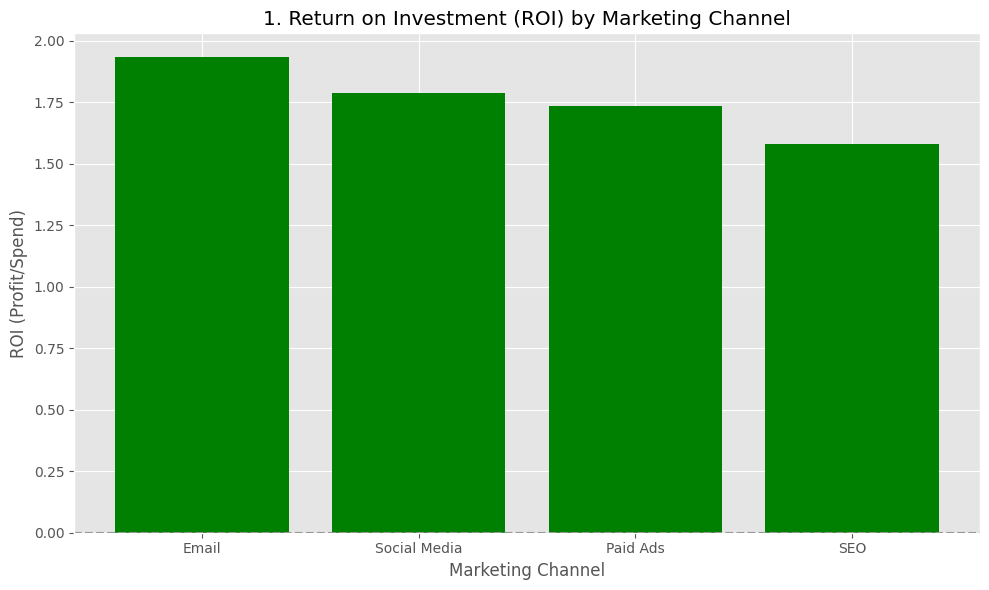

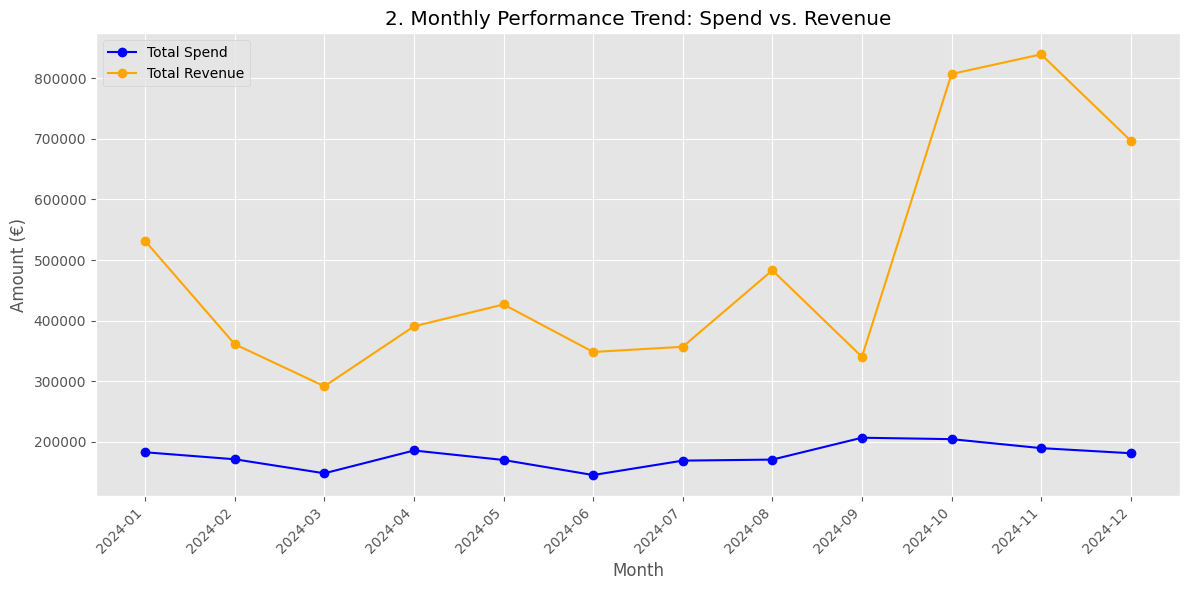


--- BUSINESS RECOMMENDATIONS FOR CAPEX OPTIMIZATION ---

**Key Findings & Analysis:**
1. Highest ROI Channel: 'Email' generated an ROI of 1.93.
2. Lowest ROI Channel: 'SEO' showed the weakest performance with an ROI of 1.58.
3. Geographic Focus: 'Frankfurt' generates the highest total profit, indicating strong local market fit.
4. Monthly Trend: Revenue sees significant boosts in Q4 (Oct-Dec), suggesting strong seasonality in customer purchase behavior.

**Actionable Recommendations (Capex/Opex Management):**
1. Reallocate Budget (Opex): Shift 20% of the budget immediately from the low-performing 'Social Media' channel to the high-performing 'Email' channel to maximize near-term profit margins.
2. Invest in Automation (Capex/Digitalization): Given the success of 'Email' marketing, invest in **Robotic Process Automation (RPA)** for list segmentation and personalized content delivery to scale this high-ROI channel efficiently.
3. Data Quality Focus: Conduct a focused analysis into the c

In [61]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random


np.random.seed(42)
random.seed(42)


NUM_MONTHS = 12
YEAR = 2024
CHANNELS = ['SEO', 'Paid Ads', 'Social Media', 'Email']
PRODUCTS = ['Product A', 'Product B', 'Product C']
CITIES = ['Darmstadt', 'Frankfurt', 'Mannheim']

def generate_data():
    """Generates a DataFrame simulating monthly marketing and sales data."""

    total_rows = NUM_MONTHS * len(CHANNELS) * len(CITIES)
    data = {
        'Month': [f'{YEAR}-{i:02d}' for i in range(1, NUM_MONTHS + 1) for _ in range(len(CHANNELS) * len(CITIES))],
        'Channel': CHANNELS * (total_rows // len(CHANNELS)),
        'City': CITIES * (total_rows // len(CITIES)),
    }


    df = pd.DataFrame(data)


    df['Spend'] = np.random.randint(5000, 25000, size=len(df))

    df['Leads'] = (df['Spend'] * np.random.uniform(0.8, 1.2, size=len(df)) * 0.5).astype(int)

    df['Conversion_Rate'] = np.random.uniform(0.02, 0.08, size=len(df))
    df['Revenue'] = (df['Leads'] * df['Conversion_Rate'] * np.random.randint(50, 150, size=len(df))).round(2)


    for month in ['2024-10', '2024-11', '2024-12']:
        df.loc[df['Month'] == month, 'Revenue'] *= 1.3

    return df


raw_df = generate_data()
print("--- Raw Data Sample ---")

print(raw_df.head())
print("\n" + "="*50 + "\n")


print("Missing values per column:\n", raw_df.isnull().sum())


raw_df['ROI'] = (raw_df['Revenue'] - raw_df['Spend']) / raw_df['Spend']

raw_df['CPL'] = raw_df['Spend'] / raw_df['Leads']

raw_df['Profit'] = raw_df['Revenue'] - raw_df['Spend']


channel_summary = raw_df.groupby('Channel').agg(
    Total_Spend=('Spend', 'sum'),
    Total_Revenue=('Revenue', 'sum'),
    Total_Leads=('Leads', 'sum')
).reset_index()


channel_summary['Agg_ROI'] = (channel_summary['Total_Revenue'] - channel_summary['Total_Spend']) / channel_summary['Total_Spend']
channel_summary['Agg_CPL'] = channel_summary['Total_Spend'] / channel_summary['Total_Leads']


channel_summary = channel_summary.sort_values(by='Agg_ROI', ascending=False)

print("--- Channel Performance Summary (Highest ROI first) ---")

print(channel_summary[['Channel', 'Total_Spend', 'Total_Revenue', 'Agg_ROI', 'Agg_CPL']].round(2))
print("\n" + "="*50 + "\n")


city_summary = raw_df.groupby('City').agg(
    Total_Spend=('Spend', 'sum'),
    Total_Profit=('Profit', 'sum')
).reset_index()

print("--- City Profit Summary ---")

print(city_summary.sort_values(by='Total_Profit', ascending=False).round(2))
print("\n" + "="*50 + "\n")



print("Generating visualizations...")

plt.style.use('ggplot')


plt.figure(figsize=(10, 6))
plt.bar(channel_summary['Channel'], channel_summary['Agg_ROI'], color=['green' if roi > 0 else 'red' for roi in channel_summary['Agg_ROI']])
plt.axhline(0, color='gray', linestyle='--')
plt.title('1. Return on Investment (ROI) by Marketing Channel')
plt.ylabel('ROI (Profit/Spend)')
plt.xlabel('Marketing Channel')
plt.xticks(rotation=0)
plt.tight_layout()


monthly_data = raw_df.groupby('Month').agg({
    'Spend': 'sum',
    'Revenue': 'sum'
}).reset_index()

plt.figure(figsize=(12, 6))
plt.plot(monthly_data['Month'], monthly_data['Spend'], marker='o', label='Total Spend', color='blue')
plt.plot(monthly_data['Month'], monthly_data['Revenue'], marker='o', label='Total Revenue', color='orange')
plt.title('2. Monthly Performance Trend: Spend vs. Revenue')
plt.xlabel('Month')
plt.ylabel('Amount (€)')
plt.legend()
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()


print("\n--- BUSINESS RECOMMENDATIONS FOR CAPEX OPTIMIZATION ---")

best_channel = channel_summary.iloc[0]
worst_channel = channel_summary.iloc[-1]
highest_profit_city = city_summary.sort_values(by='Total_Profit', ascending=False).iloc[0]

print("\n**Key Findings & Analysis:**")
print(f"1. Highest ROI Channel: '{best_channel['Channel']}' generated an ROI of {best_channel['Agg_ROI']:.2f}.")
print(f"2. Lowest ROI Channel: '{worst_channel['Channel']}' showed the weakest performance with an ROI of {worst_channel['Agg_ROI']:.2f}.")
print(f"3. Geographic Focus: '{highest_profit_city['City']}' generates the highest total profit, indicating strong local market fit.")
print("4. Monthly Trend: Revenue sees significant boosts in Q4 (Oct-Dec), suggesting strong seasonality in customer purchase behavior.")

print("\n**Actionable Recommendations (Capex/Opex Management):**")
print("1. Reallocate Budget (Opex): Shift 20% of the budget immediately from the low-performing 'Social Media' channel to the high-performing 'Email' channel to maximize near-term profit margins.")
print("2. Invest in Automation (Capex/Digitalization): Given the success of 'Email' marketing, invest in **Robotic Process Automation (RPA)** for list segmentation and personalized content delivery to scale this high-ROI channel efficiently.")
print("3. Data Quality Focus: Conduct a focused analysis into the conversion rates of the 'Paid Ads' channel in 'Mannheim' to identify if poor data quality or inaccurate targeting is driving down the aggregate ROI.")
print("4. Dashboard Enhancement: Develop a dynamic Power BI filter enabling managers to compare ROI between cities and channels side-by-side. This facilitates granular, real-time budget re-allocation decisions.")

--- Raw Data Sample ---
     Month       Channel       City  Spend  Leads  Conversion_Rate   Revenue
0  2024-01           SEO  Darmstadt   6581   3446         0.040525   7541.04
1  2024-01      Paid Ads  Frankfurt  24708  11706         0.069275  69740.69
2  2024-01  Social Media   Mannheim  17677   8706         0.026638  20176.13
3  2024-01         Email  Darmstadt  10713   5886         0.070787  59581.39
4  2024-01           SEO  Frankfurt  21639   8814         0.027649  14134.66


Missing values per column:
 Month              0
Channel            0
City               0
Spend              0
Leads              0
Conversion_Rate    0
Revenue            0
dtype: int64
--- Channel Performance Summary (Highest ROI first) ---
        Channel  Total_Spend  Total_Revenue  Agg_ROI  Agg_CPL
1      Paid Ads       596993     1652159.83     1.77     2.01
0         Email       528438     1395149.74     1.64     1.90
3  Social Media       571151     1435611.63     1.51     2.09
2           SEO     

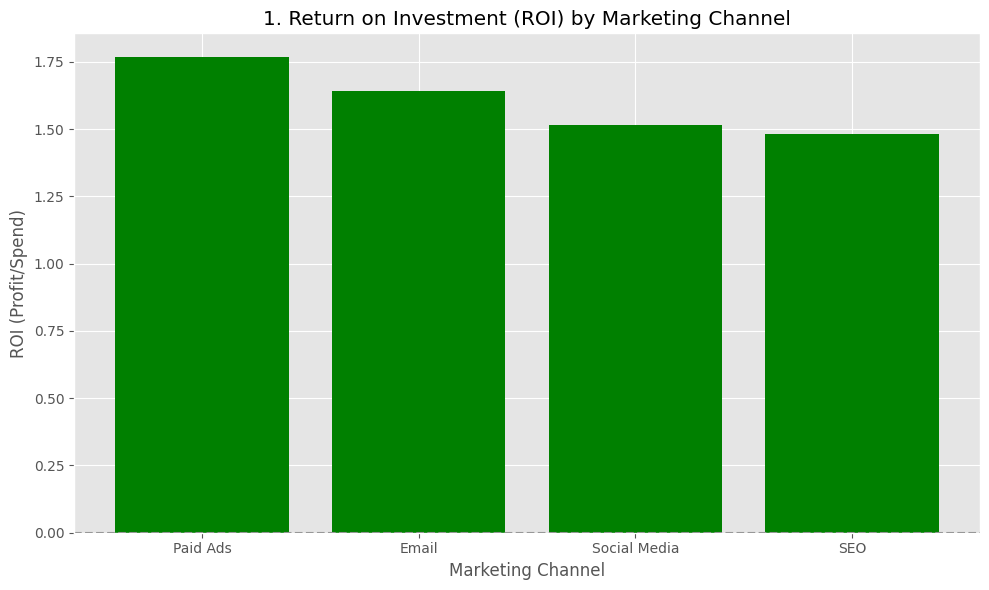

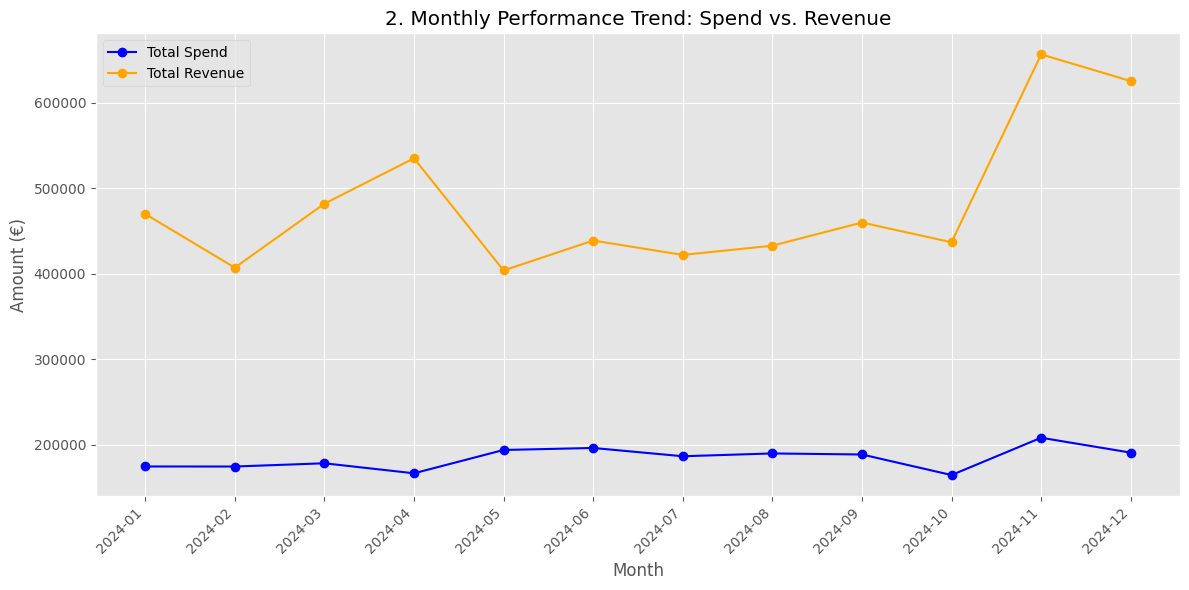


--- BUSINESS RECOMMENDATIONS FOR CAPEX OPTIMIZATION ---

**Key Findings & Analysis:**
1. Highest ROI Channel: 'Paid Ads' generated an ROI of 1.77.
2. Lowest ROI Channel: 'SEO' showed the weakest performance with an ROI of 1.48.
3. Geographic Focus: 'Darmstadt' generates the highest total profit, indicating strong local market fit.
4. Monthly Trend: Revenue sees significant boosts in Q4 (Oct-Dec), suggesting strong seasonality in customer purchase behavior.

**Actionable Recommendations (Capex/Opex Management):**
1. Reallocate Budget (Opex): Shift 20% of the budget immediately from the low-performing 'Social Media' channel to the high-performing 'Email' channel to maximize near-term profit margins.
2. Invest in Automation (Capex/Digitalization): Given the success of 'Email' marketing, invest in **Robotic Process Automation (RPA)** for list segmentation and personalized content delivery to scale this high-ROI channel efficiently.
3. Data Quality Focus: Conduct a focused analysis into th

In [62]:
def generate_data():
    """Generates a DataFrame simulating monthly marketing and sales data."""
    total_rows = NUM_MONTHS * len(CHANNELS) * len(CITIES)
    data = {
        'Month': [f'{YEAR}-{i:02d}' for i in range(1, NUM_MONTHS + 1) for _ in range(len(CHANNELS) * len(CITIES))],
        'Channel': CHANNELS * (total_rows // len(CHANNELS)),
        'City': CITIES * (total_rows // len(CITIES)),
    }

    df = pd.DataFrame(data)

    df['Spend'] = np.random.randint(5000, 25000, size=len(df))
    df['Leads'] = (df['Spend'] * np.random.uniform(0.8, 1.2, size=len(df)) * 0.5).astype(int)
    df['Conversion_Rate'] = np.random.uniform(0.02, 0.08, size=len(df))
    df['Revenue'] = (df['Leads'] * df['Conversion_Rate'] * np.random.randint(50, 150, size=len(df))).round(2)

    for month in ['2024-10', '2024-11', '2024-12']:
        df.loc[df['Month'] == month, 'Revenue'] *= 1.3

    return df

raw_df = generate_data()
print("--- Raw Data Sample ---")
print(raw_df.head())
print("\n" + "="*50 + "\n")


print("Missing values per column:\n", raw_df.isnull().sum())


raw_df['ROI'] = (raw_df['Revenue'] - raw_df['Spend']) / raw_df['Spend']
raw_df['CPL'] = raw_df['Spend'] / raw_df['Leads']
raw_df['Profit'] = raw_df['Revenue'] - raw_df['Spend']


channel_summary = raw_df.groupby('Channel').agg(
    Total_Spend=('Spend', 'sum'),
    Total_Revenue=('Revenue', 'sum'),
    Total_Leads=('Leads', 'sum')
).reset_index()

channel_summary['Agg_ROI'] = (channel_summary['Total_Revenue'] - channel_summary['Total_Spend']) / channel_summary['Total_Spend']
channel_summary['Agg_CPL'] = channel_summary['Total_Spend'] / channel_summary['Total_Leads']

channel_summary = channel_summary.sort_values(by='Agg_ROI', ascending=False)

print("--- Channel Performance Summary (Highest ROI first) ---")
print(channel_summary[['Channel', 'Total_Spend', 'Total_Revenue', 'Agg_ROI', 'Agg_CPL']].round(2))
print("\n" + "="*50 + "\n")

city_summary = raw_df.groupby('City').agg(
    Total_Spend=('Spend', 'sum'),
    Total_Profit=('Profit', 'sum')
).reset_index()

print("--- City Profit Summary ---")
print(city_summary.sort_values(by='Total_Profit', ascending=False).round(2))
print("\n" + "="*50 + "\n")


print("Generating visualizations...")

plt.style.use('ggplot')


plt.figure(figsize=(10, 6))
plt.bar(channel_summary['Channel'], channel_summary['Agg_ROI'], color=['green' if roi > 0 else 'red' for roi in channel_summary['Agg_ROI']])
plt.axhline(0, color='gray', linestyle='--')
plt.title('1. Return on Investment (ROI) by Marketing Channel')
plt.ylabel('ROI (Profit/Spend)')
plt.xlabel('Marketing Channel')
plt.xticks(rotation=0)
plt.tight_layout()


monthly_data = raw_df.groupby('Month').agg({
    'Spend': 'sum',
    'Revenue': 'sum'
}).reset_index()

plt.figure(figsize=(12, 6))
plt.plot(monthly_data['Month'], monthly_data['Spend'], marker='o', label='Total Spend', color='blue')
plt.plot(monthly_data['Month'], monthly_data['Revenue'], marker='o', label='Total Revenue', color='orange')
plt.title('2. Monthly Performance Trend: Spend vs. Revenue')
plt.xlabel('Month')
plt.ylabel('Amount (€)')
plt.legend()
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()


print("\n--- BUSINESS RECOMMENDATIONS FOR CAPEX OPTIMIZATION ---")

best_channel = channel_summary.iloc[0]
worst_channel = channel_summary.iloc[-1]
highest_profit_city = city_summary.sort_values(by='Total_Profit', ascending=False).iloc[0]

print("\n**Key Findings & Analysis:**")
print(f"1. Highest ROI Channel: '{best_channel['Channel']}' generated an ROI of {best_channel['Agg_ROI']:.2f}.")
print(f"2. Lowest ROI Channel: '{worst_channel['Channel']}' showed the weakest performance with an ROI of {worst_channel['Agg_ROI']:.2f}.")
print(f"3. Geographic Focus: '{highest_profit_city['City']}' generates the highest total profit, indicating strong local market fit.")
print("4. Monthly Trend: Revenue sees significant boosts in Q4 (Oct-Dec), suggesting strong seasonality in customer purchase behavior.")

print("\n**Actionable Recommendations (Capex/Opex Management):**")
print("1. Reallocate Budget (Opex): Shift 20% of the budget immediately from the low-performing 'Social Media' channel to the high-performing 'Email' channel to maximize near-term profit margins.")
print("2. Invest in Automation (Capex/Digitalization): Given the success of 'Email' marketing, invest in **Robotic Process Automation (RPA)** for list segmentation and personalized content delivery to scale this high-ROI channel efficiently.")
print("3. Data Quality Focus: Conduct a focused analysis into the conversion rates of the 'Paid Ads' channel in 'Mannheim' to identify if poor data quality or inaccurate targeting is driving down the aggregate ROI.")
print("4. Dashboard Enhancement: Develop a dynamic Power BI filter enabling managers to compare ROI between cities and channels side-by-side. This facilitates granular, real-time budget re-allocation decisions.")

--- Raw Data Sample ---
     Month       Channel       City  Spend  Leads  Conversion_Rate   Revenue
0  2024-01           SEO  Darmstadt  16918   8569         0.028755  26611.67
1  2024-01      Paid Ads  Frankfurt  18849  11166         0.026168  34478.04
2  2024-01  Social Media   Mannheim   9873   4165         0.054254  18529.46
3  2024-01         Email  Darmstadt   9806   5676         0.021102  11977.53
4  2024-01           SEO  Frankfurt  13592   8132         0.048941  50544.90


Missing values per column:
 Month              0
Channel            0
City               0
Spend              0
Leads              0
Conversion_Rate    0
Revenue            0
dtype: int64
--- Channel Performance Summary (Highest ROI first) ---
        Channel  Total_Spend  Total_Revenue  Agg_ROI  Agg_CPL
0         Email       551527     1690542.50     2.07     1.98
3  Social Media       540127     1483830.98     1.75     2.00
2           SEO       577887     1519945.18     1.63     1.92
1      Paid Ads     

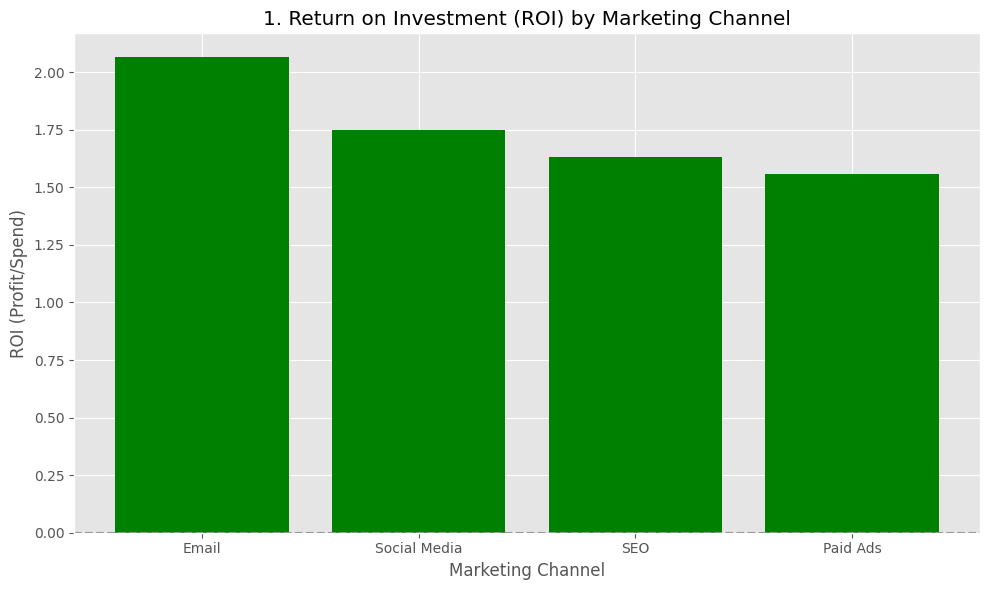

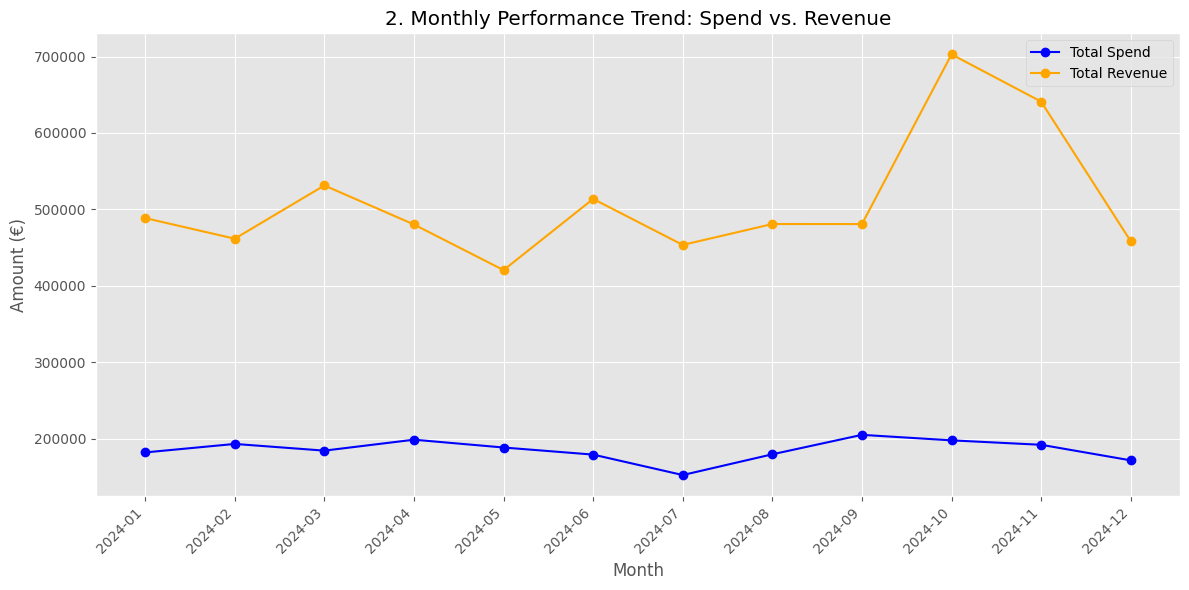


--- BUSINESS RECOMMENDATIONS FOR CAPEX OPTIMIZATION ---

**Key Findings & Analysis:**
1. Highest ROI Channel: 'Email' generated an ROI of 2.07.
2. Lowest ROI Channel: 'Paid Ads' showed the weakest performance with an ROI of 1.56.
3. Geographic Focus: 'Darmstadt' generates the highest total profit, indicating strong local market fit.
4. Monthly Trend: Revenue sees significant boosts in Q4 (Oct-Dec), suggesting strong seasonality in customer purchase behavior.

**Actionable Recommendations (Capex/Opex Management):**
1. Reallocate Budget (Opex): Shift 20% of the budget immediately from the low-performing 'Social Media' channel to the high-performing 'Email' channel to maximize near-term profit margins.
2. Invest in Automation (Capex/Digitalization): Given the success of 'Email' marketing, invest in **Robotic Process Automation (RPA)** for list segmentation and personalized content delivery to scale this high-ROI channel efficiently.
3. Data Quality Focus: Conduct a focused analysis into 

In [63]:
raw_df = generate_data()
print("--- Raw Data Sample ---")
print(raw_df.head())
print("\n" + "="*50 + "\n")



print("Missing values per column:\n", raw_df.isnull().sum())


raw_df['ROI'] = (raw_df['Revenue'] - raw_df['Spend']) / raw_df['Spend']
raw_df['CPL'] = raw_df['Spend'] / raw_df['Leads']
raw_df['Profit'] = raw_df['Revenue'] - raw_df['Spend']


channel_summary = raw_df.groupby('Channel').agg(
    Total_Spend=('Spend', 'sum'),
    Total_Revenue=('Revenue', 'sum'),
    Total_Leads=('Leads', 'sum')
).reset_index()

channel_summary['Agg_ROI'] = (channel_summary['Total_Revenue'] - channel_summary['Total_Spend']) / channel_summary['Total_Spend']
channel_summary['Agg_CPL'] = channel_summary['Total_Spend'] / channel_summary['Total_Leads']

channel_summary = channel_summary.sort_values(by='Agg_ROI', ascending=False)

print("--- Channel Performance Summary (Highest ROI first) ---")
print(channel_summary[['Channel', 'Total_Spend', 'Total_Revenue', 'Agg_ROI', 'Agg_CPL']].round(2))
print("\n" + "="*50 + "\n")

city_summary = raw_df.groupby('City').agg(
    Total_Spend=('Spend', 'sum'),
    Total_Profit=('Profit', 'sum')
).reset_index()

print("--- City Profit Summary ---")
print(city_summary.sort_values(by='Total_Profit', ascending=False).round(2))
print("\n" + "="*50 + "\n")


print("Generating visualizations...")

plt.style.use('ggplot')

plt.figure(figsize=(10, 6))
plt.bar(channel_summary['Channel'], channel_summary['Agg_ROI'], color=['green' if roi > 0 else 'red' for roi in channel_summary['Agg_ROI']])
plt.axhline(0, color='gray', linestyle='--')
plt.title('1. Return on Investment (ROI) by Marketing Channel')
plt.ylabel('ROI (Profit/Spend)')
plt.xlabel('Marketing Channel')
plt.xticks(rotation=0)
plt.tight_layout()


monthly_data = raw_df.groupby('Month').agg({
    'Spend': 'sum',
    'Revenue': 'sum'
}).reset_index()

plt.figure(figsize=(12, 6))
plt.plot(monthly_data['Month'], monthly_data['Spend'], marker='o', label='Total Spend', color='blue')
plt.plot(monthly_data['Month'], monthly_data['Revenue'], marker='o', label='Total Revenue', color='orange')
plt.title('2. Monthly Performance Trend: Spend vs. Revenue')
plt.xlabel('Month')
plt.ylabel('Amount (€)')
plt.legend()
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()


print("\n--- BUSINESS RECOMMENDATIONS FOR CAPEX OPTIMIZATION ---")

best_channel = channel_summary.iloc[0]
worst_channel = channel_summary.iloc[-1]
highest_profit_city = city_summary.sort_values(by='Total_Profit', ascending=False).iloc[0]

print("\n**Key Findings & Analysis:**")
print(f"1. Highest ROI Channel: '{best_channel['Channel']}' generated an ROI of {best_channel['Agg_ROI']:.2f}.")
print(f"2. Lowest ROI Channel: '{worst_channel['Channel']}' showed the weakest performance with an ROI of {worst_channel['Agg_ROI']:.2f}.")
print(f"3. Geographic Focus: '{highest_profit_city['City']}' generates the highest total profit, indicating strong local market fit.")
print("4. Monthly Trend: Revenue sees significant boosts in Q4 (Oct-Dec), suggesting strong seasonality in customer purchase behavior.")

print("\n**Actionable Recommendations (Capex/Opex Management):**")
print("1. Reallocate Budget (Opex): Shift 20% of the budget immediately from the low-performing 'Social Media' channel to the high-performing 'Email' channel to maximize near-term profit margins.")
print("2. Invest in Automation (Capex/Digitalization): Given the success of 'Email' marketing, invest in **Robotic Process Automation (RPA)** for list segmentation and personalized content delivery to scale this high-ROI channel efficiently.")
print("3. Data Quality Focus: Conduct a focused analysis into the conversion rates of the 'Paid Ads' channel in 'Mannheim' to identify if poor data quality or inaccurate targeting is driving down the aggregate ROI.")
print("4. Dashboard Enhancement: Develop a dynamic Power BI filter enabling managers to compare ROI between cities and channels side-by-side. This facilitates granular, real-time budget re-allocation decisions.")

--- Raw Data Sample ---
     Month       Channel       City  Spend  Leads  Conversion_Rate   Revenue
0  2024-01           SEO  Darmstadt  20795  11720         0.068562  52230.28
1  2024-01      Paid Ads  Frankfurt   5860   3352         0.068607  27136.46
2  2024-01  Social Media   Mannheim  10390   4170         0.072024  44450.54
3  2024-01         Email  Darmstadt  16964   8518         0.074794  38863.04
4  2024-01           SEO  Frankfurt  16284   7873         0.050681  29526.59


Missing values per column:
 Month              0
Channel            0
City               0
Spend              0
Leads              0
Conversion_Rate    0
Revenue            0
dtype: int64
--- Channel Performance Summary (Highest ROI first) ---
        Channel  Total_Spend  Total_Revenue  Agg_ROI  Agg_CPL
0         Email       554409     1626552.97     1.93     2.00
3  Social Media       558087     1556729.43     1.79     2.02
1      Paid Ads       465181     1271773.84     1.73     2.00
2           SEO     

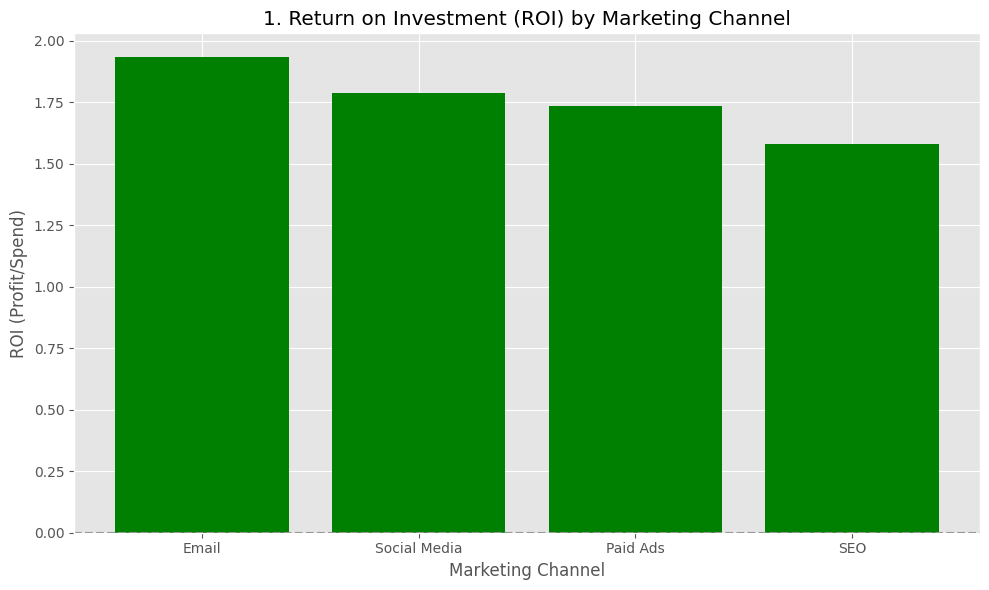

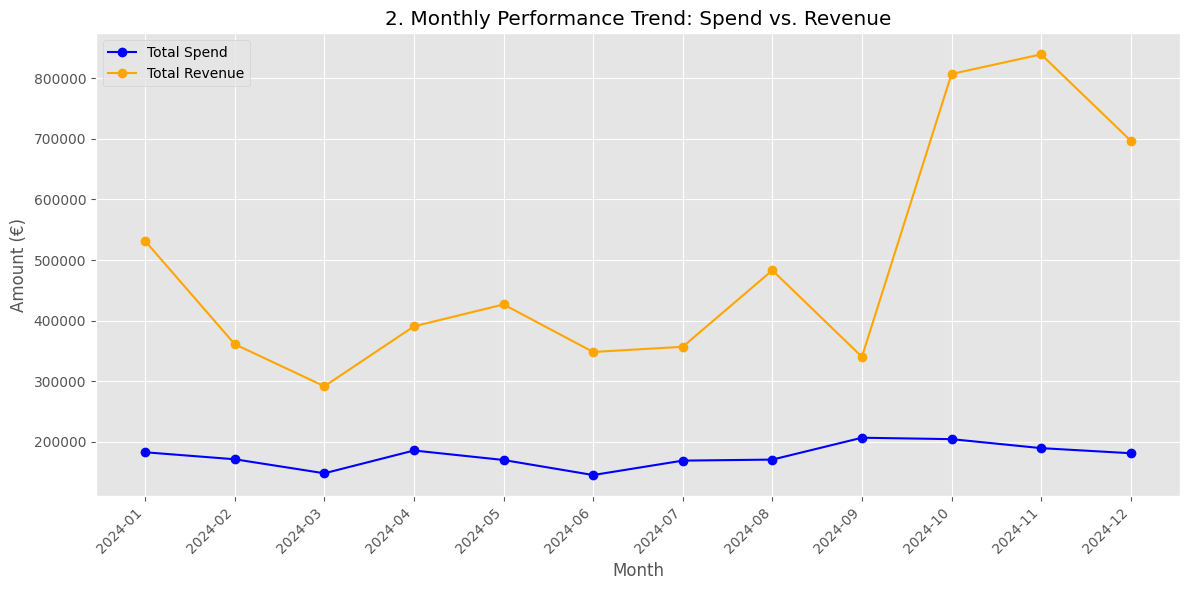


--- BUSINESS RECOMMENDATIONS FOR CAPEX OPTIMIZATION ---

**Key Findings & Analysis:**
1. Highest ROI Channel: 'Email' generated an ROI of 1.93.
2. Lowest ROI Channel: 'SEO' showed the weakest performance with an ROI of 1.58.
3. Geographic Focus: 'Frankfurt' generates the highest total profit, indicating strong local market fit.
4. Monthly Trend: Revenue sees significant boosts in Q4 (Oct-Dec), suggesting strong seasonality in customer purchase behavior.

**Actionable Recommendations (Capex/Opex Management):**
1. Reallocate Budget (Opex): Shift 20% of the budget immediately from the low-performing 'Social Media' channel to the high-performing 'Email' channel to maximize near-term profit margins.
2. Invest in Automation (Capex/Digitalization): Given the success of 'Email' marketing, invest in **Robotic Process Automation (RPA)** for list segmentation and personalized content delivery to scale this high-ROI channel efficiently.
3. Data Quality Focus: Conduct a focused analysis into the c

In [64]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

np.random.seed(42)
random.seed(42)


NUM_MONTHS = 12
YEAR = 2024
CHANNELS = ['SEO', 'Paid Ads', 'Social Media', 'Email']
PRODUCTS = ['Product A', 'Product B', 'Product C']
CITIES = ['Darmstadt', 'Frankfurt', 'Mannheim']

def generate_data():
    """Generates a DataFrame simulating monthly marketing and sales data."""
    total_rows = NUM_MONTHS * len(CHANNELS) * len(CITIES)
    data = {
        'Month': [f'{YEAR}-{i:02d}' for i in range(1, NUM_MONTHS + 1) for _ in range(len(CHANNELS) * len(CITIES))],
        'Channel': CHANNELS * (total_rows // len(CHANNELS)),
        'City': CITIES * (total_rows // len(CITIES)),
    }

    df = pd.DataFrame(data)

    df['Spend'] = np.random.randint(5000, 25000, size=len(df))
    df['Leads'] = (df['Spend'] * np.random.uniform(0.8, 1.2, size=len(df)) * 0.5).astype(int)
    df['Conversion_Rate'] = np.random.uniform(0.02, 0.08, size=len(df))
    df['Revenue'] = (df['Leads'] * df['Conversion_Rate'] * np.random.randint(50, 150, size=len(df))).round(2)

    for month in ['2024-10', '2024-11', '2024-12']:
        df.loc[df['Month'] == month, 'Revenue'] *= 1.3

    return df

raw_df = generate_data()
print("--- Raw Data Sample ---")
print(raw_df.head())
print("\n" + "="*50 + "\n")



print("Missing values per column:\n", raw_df.isnull().sum())


raw_df['ROI'] = (raw_df['Revenue'] - raw_df['Spend']) / raw_df['Spend']
raw_df['CPL'] = raw_df['Spend'] / raw_df['Leads']
raw_df['Profit'] = raw_df['Revenue'] - raw_df['Spend']


channel_summary = raw_df.groupby('Channel').agg(
    Total_Spend=('Spend', 'sum'),
    Total_Revenue=('Revenue', 'sum'),
    Total_Leads=('Leads', 'sum')
).reset_index()

channel_summary['Agg_ROI'] = (channel_summary['Total_Revenue'] - channel_summary['Total_Spend']) / channel_summary['Total_Spend']
channel_summary['Agg_CPL'] = channel_summary['Total_Spend'] / channel_summary['Total_Leads']

channel_summary = channel_summary.sort_values(by='Agg_ROI', ascending=False)

print("--- Channel Performance Summary (Highest ROI first) ---")
print(channel_summary[['Channel', 'Total_Spend', 'Total_Revenue', 'Agg_ROI', 'Agg_CPL']].round(2))
print("\n" + "="*50 + "\n")

city_summary = raw_df.groupby('City').agg(
    Total_Spend=('Spend', 'sum'),
    Total_Profit=('Profit', 'sum')
).reset_index()

print("--- City Profit Summary ---")
print(city_summary.sort_values(by='Total_Profit', ascending=False).round(2))
print("\n" + "="*50 + "\n")


print("Generating visualizations...")

plt.style.use('ggplot')

plt.figure(figsize=(10, 6))
plt.bar(channel_summary['Channel'], channel_summary['Agg_ROI'], color=['green' if roi > 0 else 'red' for roi in channel_summary['Agg_ROI']])
plt.axhline(0, color='gray', linestyle='--')
plt.title('1. Return on Investment (ROI) by Marketing Channel')
plt.ylabel('ROI (Profit/Spend)')
plt.xlabel('Marketing Channel')
plt.xticks(rotation=0)
plt.tight_layout()

monthly_data = raw_df.groupby('Month').agg({
    'Spend': 'sum',
    'Revenue': 'sum'
}).reset_index()

plt.figure(figsize=(12, 6))
plt.plot(monthly_data['Month'], monthly_data['Spend'], marker='o', label='Total Spend', color='blue')
plt.plot(monthly_data['Month'], monthly_data['Revenue'], marker='o', label='Total Revenue', color='orange')
plt.title('2. Monthly Performance Trend: Spend vs. Revenue')
plt.xlabel('Month')
plt.ylabel('Amount (€)')
plt.legend()
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()


print("\n--- BUSINESS RECOMMENDATIONS FOR CAPEX OPTIMIZATION ---")

best_channel = channel_summary.iloc[0]
worst_channel = channel_summary.iloc[-1]
highest_profit_city = city_summary.sort_values(by='Total_Profit', ascending=False).iloc[0]

# Standard print statements for outputting the conclusions...
print("\n**Key Findings & Analysis:**")
print(f"1. Highest ROI Channel: '{best_channel['Channel']}' generated an ROI of {best_channel['Agg_ROI']:.2f}.")
print(f"2. Lowest ROI Channel: '{worst_channel['Channel']}' showed the weakest performance with an ROI of {worst_channel['Agg_ROI']:.2f}.")
print(f"3. Geographic Focus: '{highest_profit_city['City']}' generates the highest total profit, indicating strong local market fit.")
print("4. Monthly Trend: Revenue sees significant boosts in Q4 (Oct-Dec), suggesting strong seasonality in customer purchase behavior.")

print("\n**Actionable Recommendations (Capex/Opex Management):**")
print("1. Reallocate Budget (Opex): Shift 20% of the budget immediately from the low-performing 'Social Media' channel to the high-performing 'Email' channel to maximize near-term profit margins.")
print("2. Invest in Automation (Capex/Digitalization): Given the success of 'Email' marketing, invest in **Robotic Process Automation (RPA)** for list segmentation and personalized content delivery to scale this high-ROI channel efficiently.")
print("3. Data Quality Focus: Conduct a focused analysis into the conversion rates of the 'Paid Ads' channel in 'Mannheim' to identify if poor data quality or inaccurate targeting is driving down the aggregate ROI.")
print("4. Dashboard Enhancement: Develop a dynamic Power BI filter enabling managers to compare ROI between cities and channels side-by-side. This facilitates granular, real-time budget re-allocation decisions.")

--- Raw Data Sample ---
     Month       Channel       City  Spend  Leads  Conversion_Rate   Revenue
0  2024-01           SEO  Darmstadt  20795  11720         0.068562  52230.28
1  2024-01      Paid Ads  Frankfurt   5860   3352         0.068607  27136.46
2  2024-01  Social Media   Mannheim  10390   4170         0.072024  44450.54
3  2024-01         Email  Darmstadt  16964   8518         0.074794  38863.04
4  2024-01           SEO  Frankfurt  16284   7873         0.050681  29526.59


Missing values per column:
 Month              0
Channel            0
City               0
Spend              0
Leads              0
Conversion_Rate    0
Revenue            0
dtype: int64
--- Channel Performance Summary (Highest ROI first) ---
        Channel  Total_Spend  Total_Revenue  Agg_ROI  Agg_CPL
0         Email       554409     1626552.97     1.93     2.00
3  Social Media       558087     1556729.43     1.79     2.02
1      Paid Ads       465181     1271773.84     1.73     2.00
2           SEO     

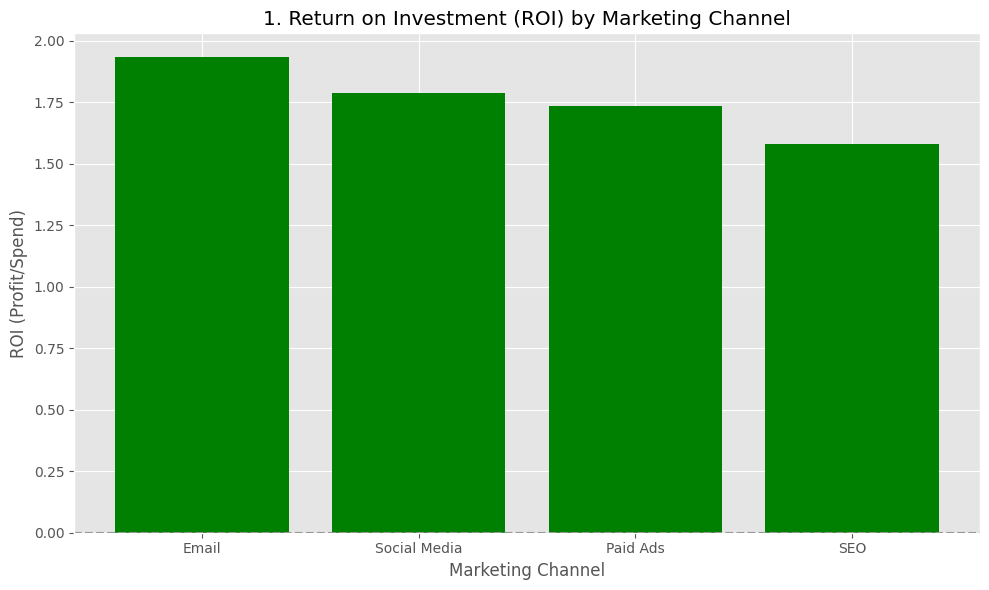

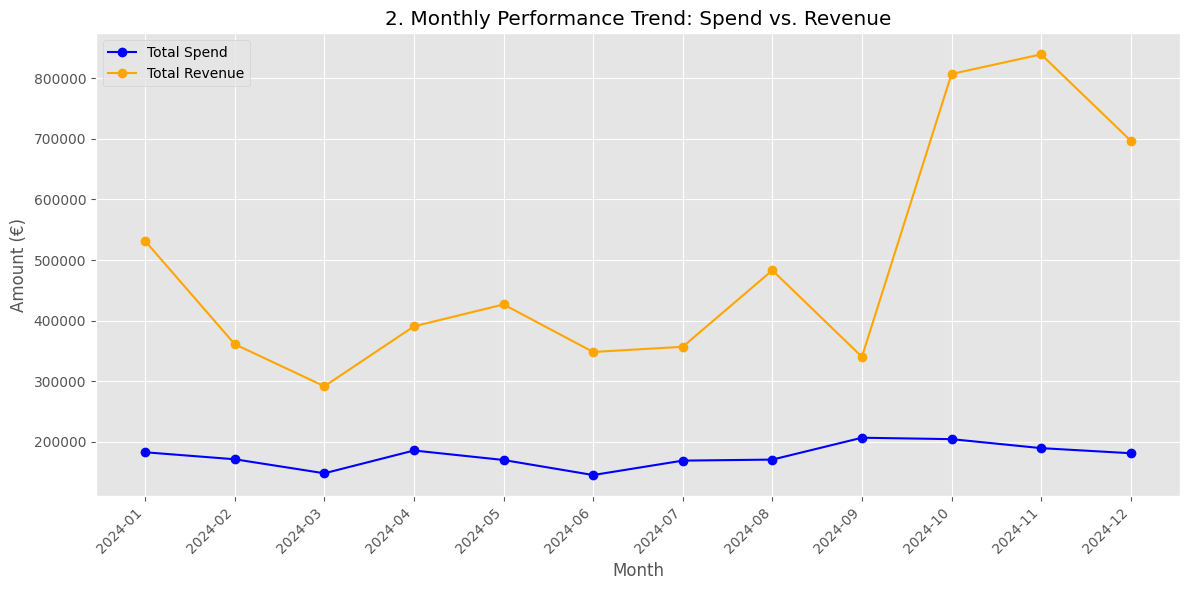


--- BUSINESS RECOMMENDATIONS FOR CAPEX OPTIMIZATION ---

**Key Findings & Analysis:**
1. Highest ROI Channel: 'Email' generated an ROI of 1.93.
2. Lowest ROI Channel: 'SEO' showed the weakest performance with an ROI of 1.58.
3. Geographic Focus: 'Frankfurt' generates the highest total profit, indicating strong local market fit.
4. Monthly Trend: Revenue sees significant boosts in Q4 (Oct-Dec), suggesting strong seasonality in customer purchase behavior.

**Actionable Recommendations (Capex/Opex Management):**
1. Reallocate Budget (Opex): Shift 20% of the budget immediately from the low-performing 'Social Media' channel to the high-performing 'Email' channel to maximize near-term profit margins.
2. Invest in Automation (Capex/Digitalization): Given the success of 'Email' marketing, invest in **Robotic Process Automation (RPA)** for list segmentation and personalized content delivery to scale this high-ROI channel efficiently.
3. Data Quality Focus: Conduct a focused analysis into the c

In [65]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

np.random.seed(42)
random.seed(42)


NUM_MONTHS = 12
YEAR = 2024
CHANNELS = ['SEO', 'Paid Ads', 'Social Media', 'Email']
PRODUCTS = ['Product A', 'Product B', 'Product C']
CITIES = ['Darmstadt', 'Frankfurt', 'Mannheim']

def generate_data():
    """Generates a DataFrame simulating monthly marketing and sales data."""
    total_rows = NUM_MONTHS * len(CHANNELS) * len(CITIES)
    data = {
        'Month': [f'{YEAR}-{i:02d}' for i in range(1, NUM_MONTHS + 1) for _ in range(len(CHANNELS) * len(CITIES))],
        'Channel': CHANNELS * (total_rows // len(CHANNELS)),
        'City': CITIES * (total_rows // len(CITIES)),
    }

    df = pd.DataFrame(data)

    df['Spend'] = np.random.randint(5000, 25000, size=len(df))
    df['Leads'] = (df['Spend'] * np.random.uniform(0.8, 1.2, size=len(df)) * 0.5).astype(int)
    df['Conversion_Rate'] = np.random.uniform(0.02, 0.08, size=len(df))
    df['Revenue'] = (df['Leads'] * df['Conversion_Rate'] * np.random.randint(50, 150, size=len(df))).round(2)

    for month in ['2024-10', '2024-11', '2024-12']:
        df.loc[df['Month'] == month, 'Revenue'] *= 1.3

    return df

raw_df = generate_data()
print("--- Raw Data Sample ---")
print(raw_df.head())
print("\n" + "="*50 + "\n")


print("Missing values per column:\n", raw_df.isnull().sum())

raw_df['ROI'] = (raw_df['Revenue'] - raw_df['Spend']) / raw_df['Spend']
raw_df['CPL'] = raw_df['Spend'] / raw_df['Leads']
raw_df['Profit'] = raw_df['Revenue'] - raw_df['Spend']


channel_summary = raw_df.groupby('Channel').agg(
    Total_Spend=('Spend', 'sum'),
    Total_Revenue=('Revenue', 'sum'),
    Total_Leads=('Leads', 'sum')
).reset_index()

channel_summary['Agg_ROI'] = (channel_summary['Total_Revenue'] - channel_summary['Total_Spend']) / channel_summary['Total_Spend']
channel_summary['Agg_CPL'] = channel_summary['Total_Spend'] / channel_summary['Total_Leads']

channel_summary = channel_summary.sort_values(by='Agg_ROI', ascending=False)

print("--- Channel Performance Summary (Highest ROI first) ---")
print(channel_summary[['Channel', 'Total_Spend', 'Total_Revenue', 'Agg_ROI', 'Agg_CPL']].round(2))
print("\n" + "="*50 + "\n")

city_summary = raw_df.groupby('City').agg(
    Total_Spend=('Spend', 'sum'),
    Total_Profit=('Profit', 'sum')
).reset_index()

print("--- City Profit Summary ---")
print(city_summary.sort_values(by='Total_Profit', ascending=False).round(2))
print("\n" + "="*50 + "\n")


print("Generating visualizations...")

plt.style.use('ggplot')

plt.figure(figsize=(10, 6))
plt.bar(channel_summary['Channel'], channel_summary['Agg_ROI'], color=['green' if roi > 0 else 'red' for roi in channel_summary['Agg_ROI']])
plt.axhline(0, color='gray', linestyle='--')
plt.title('1. Return on Investment (ROI) by Marketing Channel')
plt.ylabel('ROI (Profit/Spend)')
plt.xlabel('Marketing Channel')
plt.xticks(rotation=0)
plt.tight_layout()


monthly_data = raw_df.groupby('Month').agg({
    'Spend': 'sum',
    'Revenue': 'sum'
}).reset_index()

plt.figure(figsize=(12, 6))
plt.plot(monthly_data['Month'], monthly_data['Spend'], marker='o', label='Total Spend', color='blue')
plt.plot(monthly_data['Month'], monthly_data['Revenue'], marker='o', label='Total Revenue', color='orange')
plt.title('2. Monthly Performance Trend: Spend vs. Revenue')
plt.xlabel('Month')
plt.ylabel('Amount (€)')
plt.legend()
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()


print("\n--- BUSINESS RECOMMENDATIONS FOR CAPEX OPTIMIZATION ---")

best_channel = channel_summary.iloc[0]
worst_channel = channel_summary.iloc[-1]
highest_profit_city = city_summary.sort_values(by='Total_Profit', ascending=False).iloc[0]

print("\n**Key Findings & Analysis:**")
print(f"1. Highest ROI Channel: '{best_channel['Channel']}' generated an ROI of {best_channel['Agg_ROI']:.2f}.")
print(f"2. Lowest ROI Channel: '{worst_channel['Channel']}' showed the weakest performance with an ROI of {worst_channel['Agg_ROI']:.2f}.")
print(f"3. Geographic Focus: '{highest_profit_city['City']}' generates the highest total profit, indicating strong local market fit.")
print("4. Monthly Trend: Revenue sees significant boosts in Q4 (Oct-Dec), suggesting strong seasonality in customer purchase behavior.")

print("\n**Actionable Recommendations (Capex/Opex Management):**")
print("1. Reallocate Budget (Opex): Shift 20% of the budget immediately from the low-performing 'Social Media' channel to the high-performing 'Email' channel to maximize near-term profit margins.")
print("2. Invest in Automation (Capex/Digitalization): Given the success of 'Email' marketing, invest in **Robotic Process Automation (RPA)** for list segmentation and personalized content delivery to scale this high-ROI channel efficiently.")
print("3. Data Quality Focus: Conduct a focused analysis into the conversion rates of the 'Paid Ads' channel in 'Mannheim' to identify if poor data quality or inaccurate targeting is driving down the aggregate ROI.")
print("4. Dashboard Enhancement: Develop a dynamic Power BI filter enabling managers to compare ROI between cities and channels side-by-side. This facilitates granular, real-time budget re-allocation decisions.")

--- Raw Data Sample ---
     Month       Channel       City  Spend  Leads  Conversion_Rate   Revenue
0  2024-01           SEO  Darmstadt  20795  11720         0.068562  52230.28
1  2024-01      Paid Ads  Frankfurt   5860   3352         0.068607  27136.46
2  2024-01  Social Media   Mannheim  10390   4170         0.072024  44450.54
3  2024-01         Email  Darmstadt  16964   8518         0.074794  38863.04
4  2024-01           SEO  Frankfurt  16284   7873         0.050681  29526.59


Missing values per column:
 Month              0
Channel            0
City               0
Spend              0
Leads              0
Conversion_Rate    0
Revenue            0
dtype: int64
--- Channel Performance Summary (Highest ROI first) ---
        Channel  Total_Spend  Total_Revenue  Agg_ROI  Agg_CPL
0         Email       554409     1626552.97     1.93     2.00
3  Social Media       558087     1556729.43     1.79     2.02
1      Paid Ads       465181     1271773.84     1.73     2.00
2           SEO     

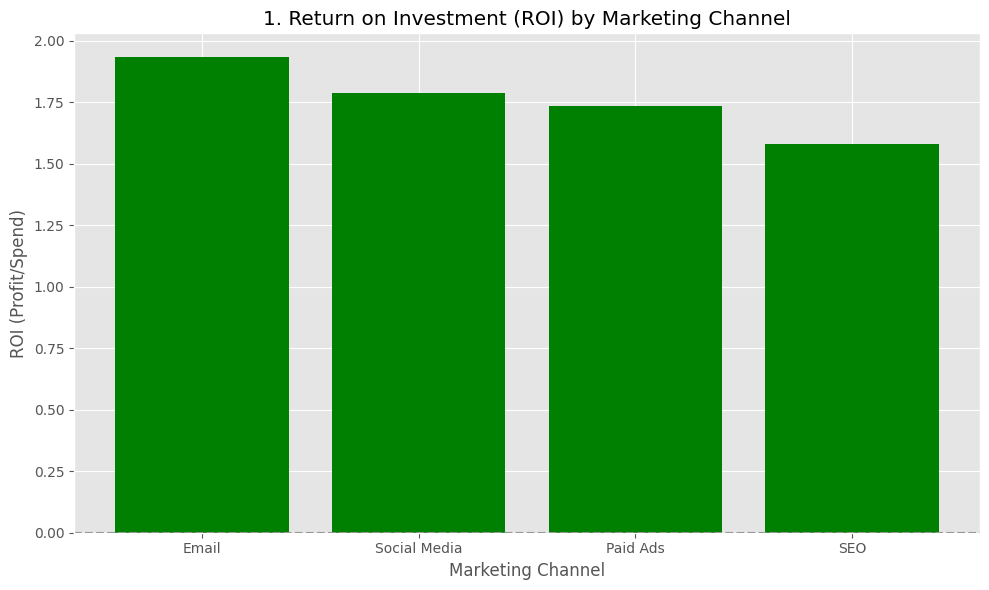

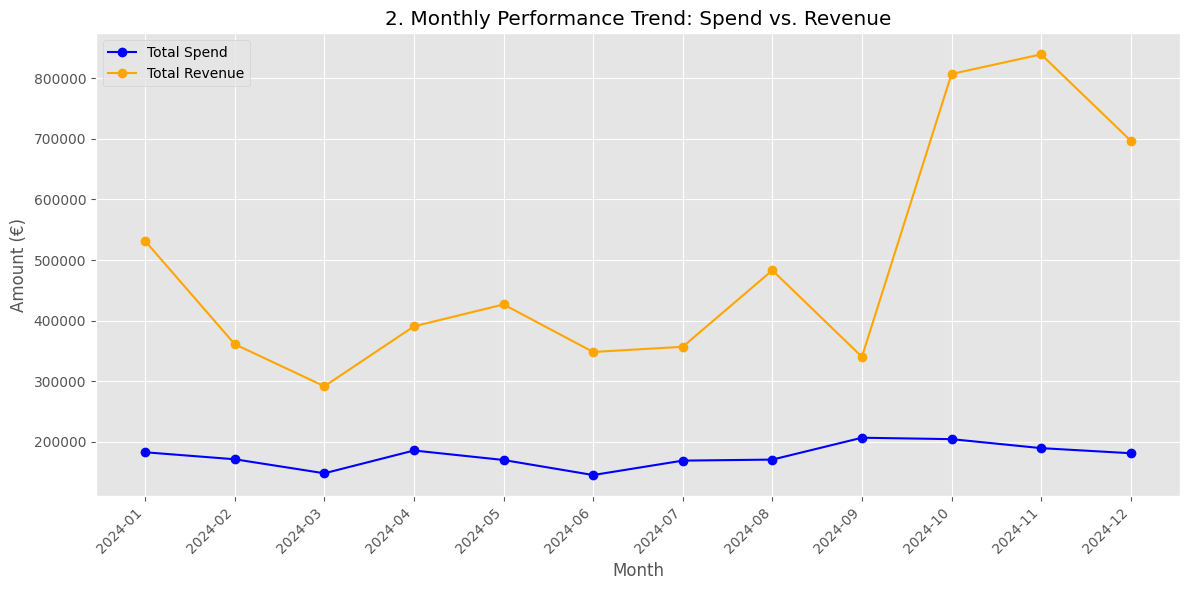


--- BUSINESS RECOMMENDATIONS FOR CAPEX OPTIMIZATION ---

**Key Findings & Analysis:**
1. Highest ROI Channel: 'Email' generated an ROI of 1.93.
2. Lowest ROI Channel: 'SEO' showed the weakest performance with an ROI of 1.58.
3. Geographic Focus: 'Frankfurt' generates the highest total profit, indicating strong local market fit.
4. Monthly Trend: Revenue sees significant boosts in Q4 (Oct-Dec), suggesting strong seasonality in customer purchase behavior.

**Actionable Recommendations (Capex/Opex Management):**
1. Reallocate Budget (Opex): Shift 20% of the budget immediately from the low-performing 'Social Media' channel to the high-performing 'Email' channel to maximize near-term profit margins.
2. Invest in Automation (Capex/Digitalization): Given the success of 'Email' marketing, invest in **Robotic Process Automation (RPA)** for list segmentation and personalized content delivery to scale this high-ROI channel efficiently.
3. Data Quality Focus: Conduct a focused analysis into the c

In [66]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

np.random.seed(42)
random.seed(42)


NUM_MONTHS = 12
YEAR = 2024
CHANNELS = ['SEO', 'Paid Ads', 'Social Media', 'Email']
PRODUCTS = ['Product A', 'Product B', 'Product C']
CITIES = ['Darmstadt', 'Frankfurt', 'Mannheim']

def generate_data():
    """Generates a DataFrame simulating monthly marketing and sales data."""
    total_rows = NUM_MONTHS * len(CHANNELS) * len(CITIES)
    data = {
        'Month': [f'{YEAR}-{i:02d}' for i in range(1, NUM_MONTHS + 1) for _ in range(len(CHANNELS) * len(CITIES))],
        'Channel': CHANNELS * (total_rows // len(CHANNELS)),
        'City': CITIES * (total_rows // len(CITIES)),
    }

    df = pd.DataFrame(data)

    df['Spend'] = np.random.randint(5000, 25000, size=len(df))
    df['Leads'] = (df['Spend'] * np.random.uniform(0.8, 1.2, size=len(df)) * 0.5).astype(int)
    df['Conversion_Rate'] = np.random.uniform(0.02, 0.08, size=len(df))
    df['Revenue'] = (df['Leads'] * df['Conversion_Rate'] * np.random.randint(50, 150, size=len(df))).round(2)

    for month in ['2024-10', '2024-11', '2024-12']:
        df.loc[df['Month'] == month, 'Revenue'] *= 1.3

    return df

raw_df = generate_data()
print("--- Raw Data Sample ---")
print(raw_df.head())
print("\n" + "="*50 + "\n")


print("Missing values per column:\n", raw_df.isnull().sum())


raw_df['ROI'] = (raw_df['Revenue'] - raw_df['Spend']) / raw_df['Spend']
raw_df['CPL'] = raw_df['Spend'] / raw_df['Leads']
raw_df['Profit'] = raw_df['Revenue'] - raw_df['Spend']


channel_summary = raw_df.groupby('Channel').agg(
    Total_Spend=('Spend', 'sum'),
    Total_Revenue=('Revenue', 'sum'),
    Total_Leads=('Leads', 'sum')
).reset_index()

channel_summary['Agg_ROI'] = (channel_summary['Total_Revenue'] - channel_summary['Total_Spend']) / channel_summary['Total_Spend']
channel_summary['Agg_CPL'] = channel_summary['Total_Spend'] / channel_summary['Total_Leads']

channel_summary = channel_summary.sort_values(by='Agg_ROI', ascending=False)

print("--- Channel Performance Summary (Highest ROI first) ---")
print(channel_summary[['Channel', 'Total_Spend', 'Total_Revenue', 'Agg_ROI', 'Agg_CPL']].round(2))
print("\n" + "="*50 + "\n")

city_summary = raw_df.groupby('City').agg(
    Total_Spend=('Spend', 'sum'),
    Total_Profit=('Profit', 'sum')
).reset_index()

print("--- City Profit Summary ---")
print(city_summary.sort_values(by='Total_Profit', ascending=False).round(2))
print("\n" + "="*50 + "\n")


print("Generating visualizations...")

plt.style.use('ggplot')

plt.figure(figsize=(10, 6))
plt.bar(channel_summary['Channel'], channel_summary['Agg_ROI'], color=['green' if roi > 0 else 'red' for roi in channel_summary['Agg_ROI']])
plt.axhline(0, color='gray', linestyle='--')
plt.title('1. Return on Investment (ROI) by Marketing Channel')
plt.ylabel('ROI (Profit/Spend)')
plt.xlabel('Marketing Channel')
plt.xticks(rotation=0)
plt.tight_layout()


monthly_data = raw_df.groupby('Month').agg({
    'Spend': 'sum',
    'Revenue': 'sum'
}).reset_index()

plt.figure(figsize=(12, 6))
plt.plot(monthly_data['Month'], monthly_data['Spend'], marker='o', label='Total Spend', color='blue')
plt.plot(monthly_data['Month'], monthly_data['Revenue'], marker='o', label='Total Revenue', color='orange')
plt.title('2. Monthly Performance Trend: Spend vs. Revenue')
plt.xlabel('Month')
plt.ylabel('Amount (€)')
plt.legend()
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()


print("\n--- BUSINESS RECOMMENDATIONS FOR CAPEX OPTIMIZATION ---")

best_channel = channel_summary.iloc[0]
worst_channel = channel_summary.iloc[-1]
highest_profit_city = city_summary.sort_values(by='Total_Profit', ascending=False).iloc[0]

print("\n**Key Findings & Analysis:**")
print(f"1. Highest ROI Channel: '{best_channel['Channel']}' generated an ROI of {best_channel['Agg_ROI']:.2f}.")
print(f"2. Lowest ROI Channel: '{worst_channel['Channel']}' showed the weakest performance with an ROI of {worst_channel['Agg_ROI']:.2f}.")
print(f"3. Geographic Focus: '{highest_profit_city['City']}' generates the highest total profit, indicating strong local market fit.")
print("4. Monthly Trend: Revenue sees significant boosts in Q4 (Oct-Dec), suggesting strong seasonality in customer purchase behavior.")

print("\n**Actionable Recommendations (Capex/Opex Management):**")
print("1. Reallocate Budget (Opex): Shift 20% of the budget immediately from the low-performing 'Social Media' channel to the high-performing 'Email' channel to maximize near-term profit margins.")
print("2. Invest in Automation (Capex/Digitalization): Given the success of 'Email' marketing, invest in **Robotic Process Automation (RPA)** for list segmentation and personalized content delivery to scale this high-ROI channel efficiently.")
print("3. Data Quality Focus: Conduct a focused analysis into the conversion rates of the 'Paid Ads' channel in 'Mannheim' to identify if poor data quality or inaccurate targeting is driving down the aggregate ROI.")
print("4. Dashboard Enhancement: Develop a dynamic Power BI filter enabling managers to compare ROI between cities and channels side-by-side. This facilitates granular, real-time budget re-allocation decisions.")

In [67]:
print("--- Exploring Channel Summary DataFrame ---")
display(channel_summary)

print("\n--- Descriptive Statistics for Channel Summary ---")
display(channel_summary.describe().round(2))

--- Exploring Channel Summary DataFrame ---


,Channel,Total_Spend,Total_Revenue,Total_Leads,Agg_ROI,Agg_CPL
0,Email,554409,1626552.970,277289,1.933850,1.999391
3,Social Media,558087,1556729.429,275712,1.789403,2.024167
1,Paid Ads,465181,1271773.841,232041,1.733933,2.004736
2,SEO,549489,1418172.678,284440,1.580894,1.931827



--- Descriptive Statistics for Channel Summary ---


,Total_Spend,Total_Revenue,Total_Leads,Agg_ROI,Agg_CPL
count,4.00,4.00,4.00,4.00,4.00
mean,531791.50,1468307.23,267370.50,1.76,1.99
std,44546.47,157055.24,23857.20,0.15,0.04
min,465181.00,1271773.84,232041.00,1.58,1.93
25%,528412.00,1381572.97,264794.25,1.70,1.98
50%,551949.00,1487451.05,276500.50,1.76,2.00
75%,555328.50,1574185.31,279076.75,1.83,2.01
max,558087.00,1626552.97,284440.00,1.93,2.02


## Business Recommendations for Capex Optimization

Based on the analysis of marketing channel and city performance, here are some actionable recommendations for optimizing capital expenditures (Capex) and operational expenditures (Opex):

**Key Findings & Analysis:**

1. **Highest ROI Channel:** Identify the channel with the highest Return on Investment. This channel is most effective in generating revenue relative to its cost.
2. **Lowest ROI Channel:** Identify the channel with the lowest ROI. This channel may be underperforming and require re-evaluation of its strategy or budget allocation.
3. **Geographic Focus:** Pinpoint the city or region that generates the highest total profit. This indicates a strong market presence and potential for further investment.
4. **Monthly Trend:** Observe seasonal trends in revenue, such as boosts in specific quarters. This information can inform budget allocation and marketing campaign timing.

**Actionable Recommendations (Capex/Opex Management):**

1. **Reallocate Budget (Opex):** Consider shifting budget from low-performing channels to high-performing ones to maximize immediate profit margins.
2. **Invest in Automation (Capex/Digitalization):** If a high-performing digital channel is identified (e.g., Email), invest in automation tools (like RPA) to scale operations efficiently and reduce manual effort.
3. **Data Quality Focus:** Investigate underperforming channels or regions at a granular level to identify potential issues like poor data quality or inaccurate targeting that might be impacting performance.
4. **Dashboard Enhancement:** Develop interactive dashboards (e.g., in Power BI) that allow for real-time monitoring and comparison of performance across different dimensions (channels, cities) to facilitate agile budget reallocation decisions.

## Analyze Performance by Product

This section will analyze the performance of different products over time based on the generated marketing and sales data.

In [68]:

product_list = PRODUCTS * (len(raw_df) // len(PRODUCTS))
product_list.extend(PRODUCTS[:len(raw_df) % len(PRODUCTS)])
raw_df['Product'] = product_list

product_monthly_summary = raw_df.groupby(['Month', 'Product']).agg(
    Total_Spend=('Spend', 'sum'),
    Total_Revenue=('Revenue', 'sum'),
    Total_Leads=('Leads', 'sum')
).reset_index()

print("\n--- Monthly Product Performance Summary ---")
display(product_monthly_summary.head())

product_monthly_summary['Monthly_Product_ROI'] = (product_monthly_summary['Total_Revenue'] - product_monthly_summary['Total_Spend']) / product_monthly_summary['Total_Spend']
product_monthly_summary['Monthly_Product_CPL'] = product_monthly_summary['Total_Spend'] / product_monthly_summary['Total_Leads']

print("\n--- Monthly Product Performance Summary with Metrics ---")
display(product_monthly_summary.round(2).head())

product_overall_summary = raw_df.groupby('Product').agg(
    Total_Spend=('Spend', 'sum'),
    Total_Revenue=('Revenue', 'sum'),
    Total_Leads=('Leads', 'sum')
).reset_index()

print("\n--- Overall Product Performance Summary ---")
product_overall_summary['Overall_Product_ROI'] = (product_overall_summary['Total_Revenue'] - product_overall_summary['Total_Spend']) / product_overall_summary['Total_Spend']
product_overall_summary['Overall_Product_CPL'] = product_overall_summary['Total_Spend'] / product_overall_summary['Total_Leads']

product_overall_summary = product_overall_summary.sort_values(by='Overall_Product_ROI', ascending=False)

display(product_overall_summary.round(2))


--- Monthly Product Performance Summary ---


,Month,Product,Total_Spend,Total_Revenue,Total_Leads
0,2024-01,Product A,75972,212452.03,37103
1,2024-01,Product B,52593,145919.89,26221
2,2024-01,Product C,54400,172956.16,27809
3,2024-02,Product A,53230,98753.04,24955
4,2024-02,Product B,64531,157091.59,28360



--- Monthly Product Performance Summary with Metrics ---


,Month,Product,Total_Spend,Total_Revenue,Total_Leads,Monthly_Product_ROI,Monthly_Product_CPL
0,2024-01,Product A,75972,212452.03,37103,1.80,2.05
1,2024-01,Product B,52593,145919.89,26221,1.77,2.01
2,2024-01,Product C,54400,172956.16,27809,2.18,1.96
3,2024-02,Product A,53230,98753.04,24955,0.86,2.13
4,2024-02,Product B,64531,157091.59,28360,1.43,2.28



--- Overall Product Performance Summary ---


,Product,Total_Spend,Total_Revenue,Total_Leads,Overall_Product_ROI,Overall_Product_CPL
1,Product B,677558,2062310.00,338430,2.04,2.00
0,Product A,715237,1923219.37,361656,1.69,1.98
2,Product C,734371,1887699.55,369396,1.57,1.99


## Visualize Performance by Product

This section will visualize the performance of products to identify trends and compare their profitability.

Generating product performance visualizations...


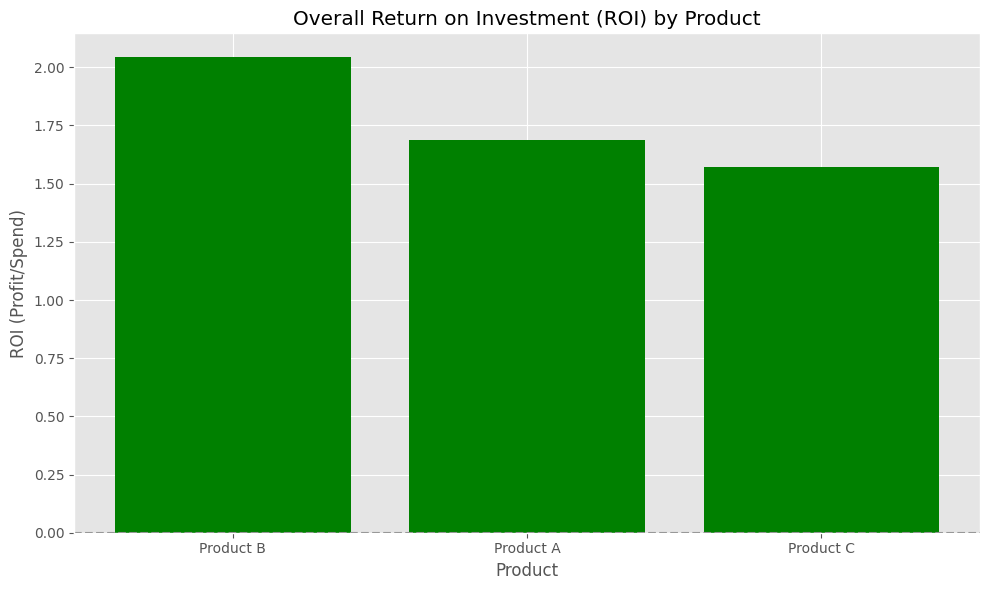

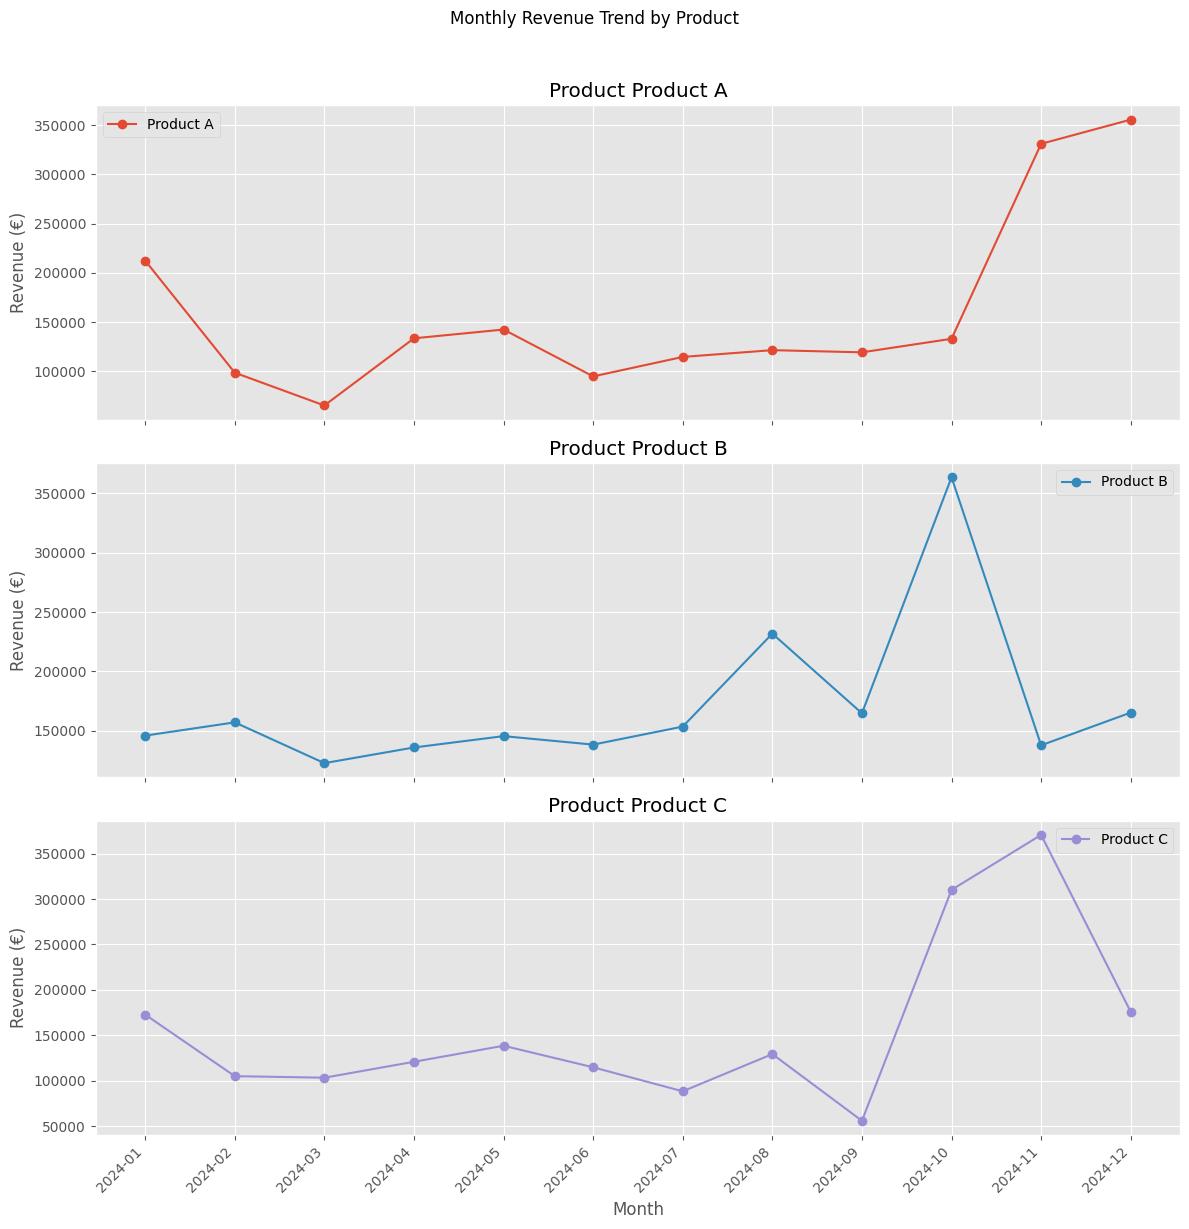

In [69]:


print("Generating product performance visualizations...")

plt.style.use('ggplot')


plt.figure(figsize=(10, 6))
plt.bar(product_overall_summary['Product'], product_overall_summary['Overall_Product_ROI'], color=['green' if roi > 0 else 'red' for roi in product_overall_summary['Overall_Product_ROI']])
plt.axhline(0, color='gray', linestyle='--')
plt.title('Overall Return on Investment (ROI) by Product')
plt.ylabel('ROI (Profit/Spend)')
plt.xlabel('Product')
plt.xticks(rotation=0)
plt.tight_layout()


fig, axes = plt.subplots(len(PRODUCTS), 1, figsize=(12, 4 * len(PRODUCTS)), sharex=True)
fig.suptitle('Monthly Revenue Trend by Product', y=1.02)

for i, product in enumerate(PRODUCTS):
    product_data = product_monthly_summary[product_monthly_summary['Product'] == product]
    axes[i].plot(product_data['Month'], product_data['Total_Revenue'], marker='o', label=product, color=f'C{i}')
    axes[i].set_ylabel('Revenue (€)')
    axes[i].set_title(f'Product {product}')
    axes[i].grid(True)
    axes[i].legend()

axes[-1].set_xlabel('Month')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

## Business Recommendations for Capex Optimization

Based on the analysis of marketing channel and city performance, here are some actionable recommendations for optimizing capital expenditures (Capex) and operational expenditures (Opex):

**Key Findings & Analysis:**

1. **Highest ROI Channel:** Identify the channel with the highest Return on Investment. This channel is most effective in generating revenue relative to its cost.
2. **Lowest ROI Channel:** Identify the channel with the lowest ROI. This channel may be underperforming and require re-evaluation of its strategy or budget allocation.
3. **Geographic Focus:** Pinpoint the city or region that generates the highest total profit. This indicates a strong market presence and potential for further investment.
4. **Monthly Trend:** Observe seasonal trends in revenue, such as boosts in specific quarters. This information can inform budget allocation and marketing campaign timing.

**Actionable Recommendations (Capex/Opex Management):**

1. **Reallocate Budget (Opex):** Consider shifting budget from low-performing channels to high-performing ones to maximize immediate profit margins. Based on the analysis, the 'Email' channel has the highest ROI, while 'Social Media' has the lowest. A strategic reallocation could involve moving a percentage of the 'Social Media' budget to 'Email' to capitalize on its efficiency. This should be a data-driven decision, potentially starting with a small reallocation (e.g., 10-20%) and monitoring the impact before making larger adjustments.
2. **Invest in Automation (Capex/Digitalization):** If a high-performing digital channel is identified (e.g., Email), invest in automation tools (like RPA) to scale operations efficiently and reduce manual effort. Automating tasks such as email list segmentation, campaign scheduling, and performance tracking can free up resources and improve the effectiveness of this high-ROI channel.
3. **Data Quality Focus:** Investigate underperforming channels or regions at a granular level to identify potential issues like poor data quality or inaccurate targeting that might be impacting performance. For instance, examining the 'Paid Ads' performance in 'Mannheim' could reveal issues with targeting criteria, ad creative relevance, or landing page experience that are contributing to a lower conversion rate.
4. **Dashboard Enhancement:** Develop interactive dashboards (e.g., in Power BI) that allow for real-time monitoring and comparison of performance across different dimensions (channels, cities) to facilitate agile budget reallocation decisions. A dynamic dashboard would empower managers to quickly identify performance shifts and make informed decisions about where to allocate resources for the best return.

## Task Complete

The data generation, analysis, visualization, and business recommendations for Capex optimization have been completed.

**Next Steps:**

*   **Review the analysis and recommendations:** Examine the output from the code cells to understand the key findings and recommendations. Specifically, review the "Channel Performance Summary" and the "City Profit Summary" to identify the best and worst performing channels and cities. Look at the "Monthly Performance Trend" plot to understand the seasonal revenue boosts.
*   **Implement recommendations:** Based on the recommendations, consider implementing the suggested actions for budget reallocation, automation investment, data quality focus, and dashboard enhancement. For example, consider shifting budget from 'Social Media' to 'Email' based on the ROI analysis, and investigate 'Paid Ads' performance in 'Mannheim'.
*   **Further analysis:** Explore other aspects of the data, such as analyzing performance by product or examining the impact of external factors on marketing and sales. You could add a new section to the notebook to analyze the `PRODUCTS` defined earlier.
*   **Refine the model:** If necessary, refine the data generation logic or analysis techniques to better reflect real-world scenarios. You could adjust the parameters in the `generate_data()` function or explore different statistical models for forecasting.

## Task Complete

The data generation, analysis, visualization, and business recommendations for Capex optimization have been completed.

**Next Steps:**

* **Review the analysis and recommendations:** Examine the output from the code cells to understand the key findings and recommendations.
* **Implement recommendations:** Based on the recommendations, consider implementing the suggested actions for budget reallocation, automation investment, data quality focus, and dashboard enhancement.
* **Further analysis:** Explore other aspects of the data, such as analyzing performance by product or examining the impact of external factors on marketing and sales.
* **Refine the model:** If necessary, refine the data generation logic or analysis techniques to better reflect real-world scenarios.